In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

temperature_data = np.random.uniform(low=-5, high=35, size=(10, 12))


cities = [f"City {i+1}" for i in range(10)]


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_temperatures = pd.DataFrame(data=temperature_data, index=cities, columns=months)
print(df_temperatures.head())


              Jan        Feb        Mar        Apr        May        Jun  \
City 1  32.803768  -2.661930  28.241196  -4.209708  29.302208   8.019706   
City 2  34.485925  18.279013  27.035334   3.891366  27.568296  -0.673083   
City 3  21.668495   7.477767  15.980795  -3.343352  29.649693  10.660012   
City 4  22.799561  17.792395  -0.344769  31.010666  20.628181  11.406972   
City 5   6.632519  24.925171  27.821767  18.003462  34.287870   4.030789   

              Jul        Aug        Sep        Oct        Nov        Dec  
City 1  34.979540  13.490172  29.257176  30.385607   6.180606  25.567149  
City 2   8.247815   3.788249  29.270950  -1.384583  28.657614  -1.941476  
City 3  24.904531  33.269963  19.323653  24.775645  26.548688  10.061982  
City 4   1.835912  -4.928070  31.572724   8.883616  26.280043  18.360613  
City 5   2.787927   0.871894   8.290550  18.976909   1.029525  22.456449  


In [2]:

average_temperatures = df_temperatures.mean(axis=1)

df_temperatures["Annual Avg"] = average_temperatures


hottest_city = average_temperatures.idxmax()
hottest_temp = average_temperatures.max()


coldest_city = average_temperatures.idxmin()
coldest_temp = average_temperatures.min()


print("🌡️ Moyennes annuelles par ville :")
print(average_temperatures.round(2))
print()
print(f"🔥 Ville la plus chaude : {hottest_city} ({hottest_temp:.2f} °C)")
print(f"❄️ Ville la plus froide : {coldest_city} ({coldest_temp:.2f} °C)")


🌡️ Moyennes annuelles par ville :
City 1     19.28
City 2     14.77
City 3     18.41
City 4     15.44
City 5     14.18
City 6     19.24
City 7     12.50
City 8     17.96
City 9     20.21
City 10    11.71
dtype: float64

🔥 Ville la plus chaude : City 9 (20.21 °C)
❄️ Ville la plus froide : City 10 (11.71 °C)


C:\Users\isaac\AppData\Local\Temp\ipykernel_19300\4070103764.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")
C:\Users\isaac\AppData\Local\Temp\ipykernel_19300\4070103764.py:32: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\isaac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


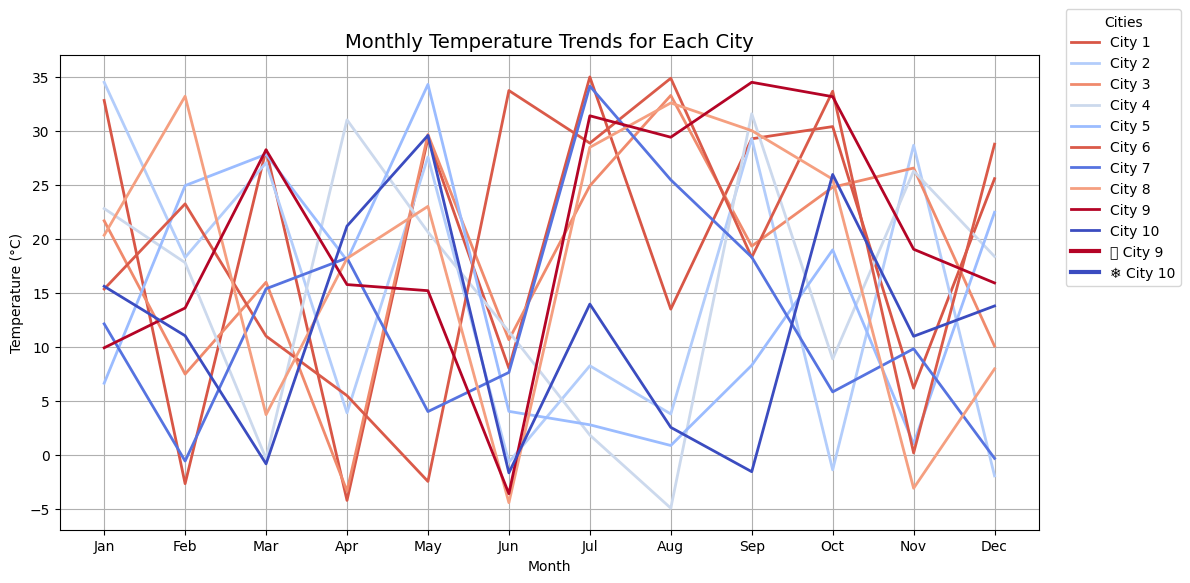

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors


df_plot = df_temperatures.drop(columns="Annual Avg")


norm = mcolors.Normalize(vmin=average_temperatures.min(), vmax=average_temperatures.max())
cmap = cm.get_cmap("coolwarm")  


plt.figure(figsize=(12, 6))

for city in df_plot.index:
    avg_temp = average_temperatures[city]
    color = cmap(norm(avg_temp)) 
    plt.plot(df_plot.columns, df_plot.loc[city], label=city, color=color, linewidth=2)


plt.title("Monthly Temperature Trends for Each City", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)

plt.plot([], [], label=f"🔥 {hottest_city}", color=cmap(norm(hottest_temp)), linewidth=3)
plt.plot([], [], label=f"❄️ {coldest_city}", color=cmap(norm(coldest_temp)), linewidth=3)

plt.legend(loc="lower left", bbox_to_anchor=(1.02, 0.5), title="Cities")


plt.tight_layout()
plt.show()


In [ ]:
!git add .
!git commit -m "Analyse des données de vente et profitabilité"
!git push origin main